In [115]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time 
from time import sleep


# Normalizing our data, adding timestamp column to view the current price


pd.set_option('display.max_columns', None)

In [116]:
# Using API from coinmarketcap to connect to their website and get data on crypto prices.

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fd294ffa-a381-4db6-bbbc-f559618c8b97',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      ##print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)

    #Writing our data into a CSV
    # making sure new headers don't add
    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'API.csv')


In [117]:
# this loop runs our API every minute 333 times (max allowed requests by coinmarketcap) 
#and gets prices of crypto every minute to write them into a csv
for i in range(333): #api is limited to 333 runs per day - that's why we run it 333 times
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #run script every minute
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [127]:
# Showing percent changes in price by timeperiod fpr each crypto
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.44302,0.31587,3.43461,21.48799,20.91591,72.90016
Ethereum,-0.37283,-0.64052,1.91394,9.78460,11.19840,50.77827
Tether,-0.01156,0.00052,-0.20737,-0.01880,-0.02327,0.03137
BNB,-0.26409,0.02212,-2.37154,4.24579,0.28185,29.80798
USD Coin,-0.01189,-0.01020,0.06510,-0.02647,-0.03931,-0.03417
XRP,-0.15824,-1.69387,22.12946,42.90491,31.08277,59.40937
Cardano,-0.28709,-1.82050,2.15407,4.10477,-2.92204,56.52318
Dogecoin,-0.27956,-1.34551,-2.26015,-8.49830,-16.79108,10.65398
Polygon,-0.37430,-1.74964,-0.50825,-9.80782,-6.89730,46.84796


In [129]:
# Making values a bit more readable 
df4 = df3.stack()
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.44302
        quote.USD.percent_change_24h  0.31587
        quote.USD.percent_change_7d   3.43461
        quote.USD.percent_change_30d 21.48799
        quote.USD.percent_change_60d 20.91591
...                                       ...
TRON    quote.USD.percent_change_24h  0.66844
        quote.USD.percent_change_7d   3.96123
        quote.USD.percent_change_30d -6.28800
        quote.USD.percent_change_60d  2.14073
        quote.USD.percent_change_90d 20.47471

[90 rows x 1 columns]

In [134]:
# Adding indicies to our table
index = pd.Index(range(90))
df6 = df5.reset_index()

# Let's rename the column 'level_1' to make it more understandable
df7 = df6.rename(columns={'level_1': 'percent_change'})

# Now let's change column names to make it more readable
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.44302
1,Bitcoin,24h,0.31587
2,Bitcoin,7d,3.43461
3,Bitcoin,30d,21.48799
4,Bitcoin,60d,20.91591
...,...,...,...
85,TRON,24h,0.66844
86,TRON,7d,3.96123
87,TRON,30d,-6.28800
88,TRON,60d,2.14073


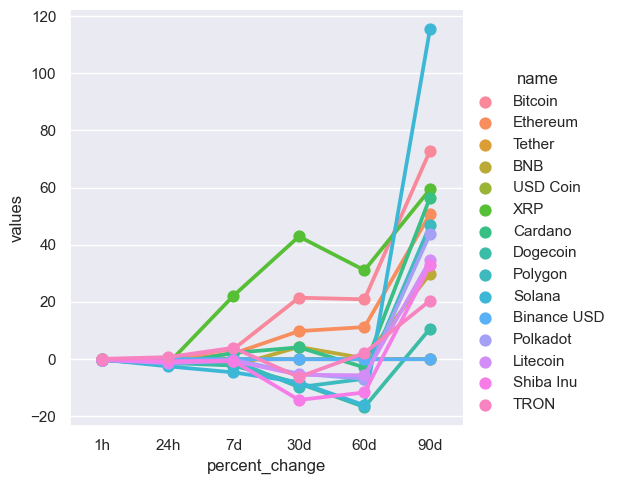

In [140]:
# Plotting percent change of price for different crypto
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x = 'percent_change', y = 'values', hue='name', data=df7, kind='point')

In [141]:
#Let's now get data only for bitcoin
df10 = df[['name','quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

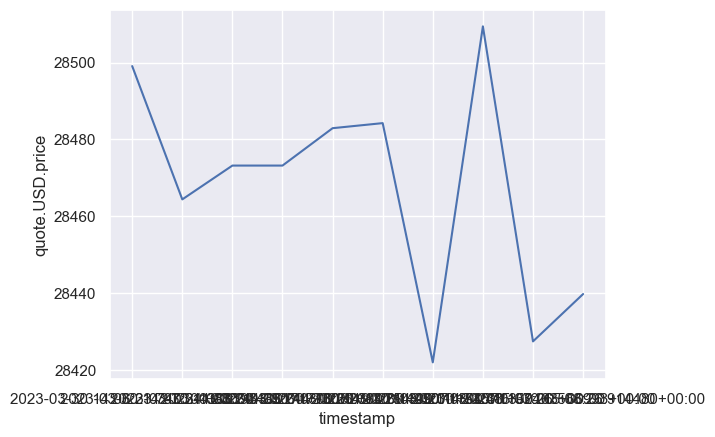

In [142]:
# Let's plot price of bitcoin
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)